
# Pdf of the log

1. Use numpy to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$.


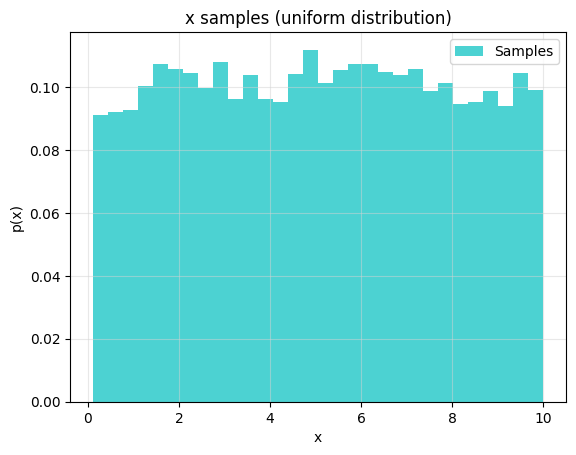

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000

# Extract N samples from the uniform distribution and plot the histogram
x = np.random.uniform(low=0.1, high=10, size = N)
plt.hist(x, bins=30, density=True, color = 'c', alpha = 0.7, histtype = 'stepfilled', label = 'Samples')
plt.title('x samples (uniform distribution)')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(alpha=0.5, color = 'lightgray')
plt.legend()
plt.show()

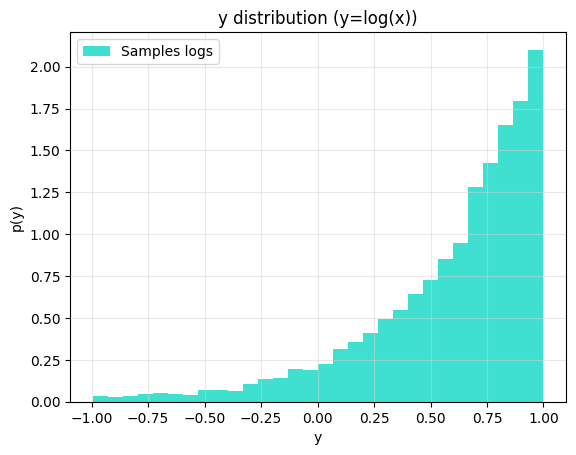

In [3]:
# Compute the log and plot the histogram
y = np.log10(x)
plt.hist(y, bins=30, density=True, color = 'turquoise', histtype = 'stepfilled', label = 'Samples logs')
plt.title('y distribution (y=log(x))')
plt.xlabel('y')
plt.ylabel('p(y)')
plt.grid(alpha=0.5, color = 'lightgray')
plt.legend()
plt.show()

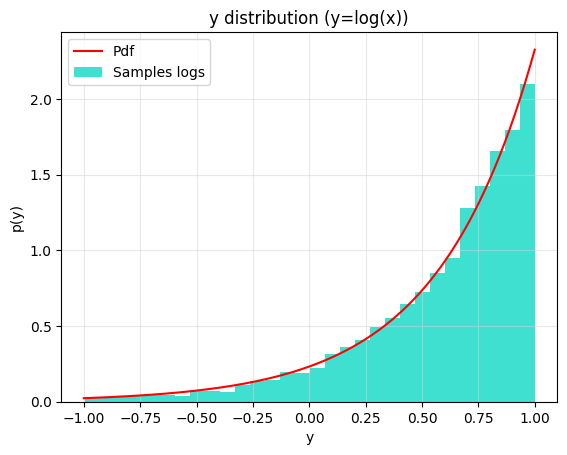

In [4]:
# Theoretical value: p(y) = |dx/dy|p(x), where:
#      p(x) is the uniform distribution: p(x) = 1/(high-low)=1/(10-0.1)
#      p(y) is the log distribution
#      y = logx -> x = 10^y -> |dx/dy| = 10^y * ln(10)
# -> p(y) = (10^y * ln(10))/(10-0.1)

# Define the pdf p(y)
x_axis = np.linspace(-1, 1, 1000)
pdf = 10**x_axis * np.log(10)/(10-0.1)

# Plot p(y) over the y histogram
plt.plot(x_axis, pdf, label='Pdf', color='red')
plt.hist(y, bins=30, density=True, color = 'turquoise', histtype = 'stepfilled', label = 'Samples logs')
plt.title('y distribution (y=log(x))')
plt.xlabel('y')
plt.ylabel('p(y)')
plt.grid(alpha=0.5, color = 'lightgray')
plt.legend()
plt.show()

In [14]:
# log(mean(x)) vs mean(y):
log_mean_x = np.log10(np.mean(x))
mean_y = np.mean(y)
print('Number of samples: ' + str(N))
print('The log of the mean of x is ' + str(log_mean_x))
print('The mean of y is ' + str(mean_y))
print('The values differ by ' + str(abs(log_mean_x - mean_y)))
print()

log_median_x = np.log10(np.median(x))
median_y = np.median(y)
print('The log of the median of x is ' + str(log_median_x))
print('The median of y is ' + str(median_y))
print('The values differ by ' + str(abs(log_median_x - median_y)))
print()


Number of samples: 100000
The log of the mean of x is 0.7035588533622781
The mean of y is 0.586029195894216
The values differ by 0.1175296574680621

The log of the median of x is 0.7038527579640432
The median of y is 0.7038527578565378
The values differ by 1.0750544898741055e-10



As can be seen, the values obtained through the mean are different, while the ones obtained through the median are almost the same.

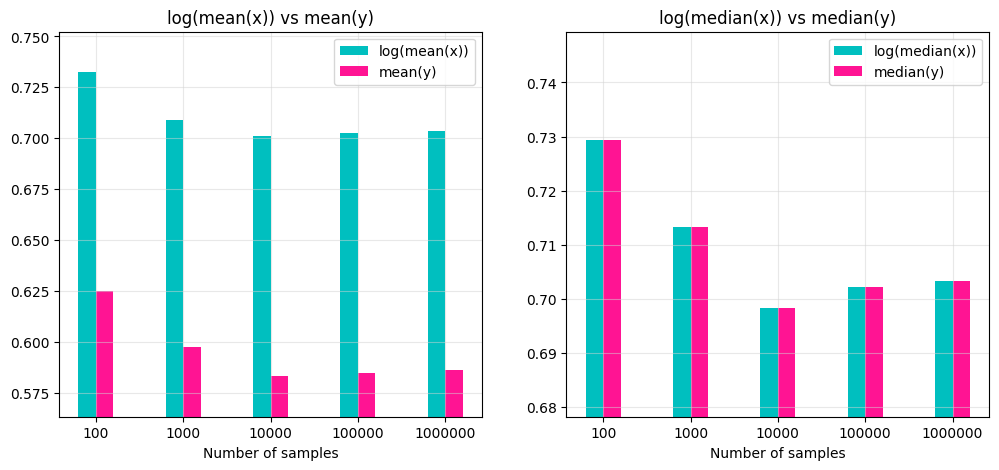

In [39]:
# How do the values change as N increases?

Values = [100, 1000, 10000, 100000, 1000000]

means_x = np.zeros(len(Values))
medians_x = np.zeros(len(Values))
means_y = np.zeros(len(Values))
medians_y = np.zeros(len(Values))

for i, N in enumerate(Values):
    x = np.random.uniform(low=0.1, high=10, size = N)
    y = np.log10(x)

    means_x[i] = np.log10(np.mean(x))
    means_y[i] = np.mean(y)

    medians_x[i] = np.log10(np.median(x))
    medians_y[i] = np.median(y)

fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 
ticks = np.arange(len(Values))

axs[0].bar([i - 0.1 for i in ticks], means_x, width=0.2, label = 'log(mean(x))', color ='c')
axs[0].bar([i + 0.1 for i in ticks], means_y, width=0.2, label = 'mean(y)', color ='deeppink')
axs[0].set_xticks(ticks)
axs[0].set_xticklabels(Values)
axs[0].set_xlabel('Number of samples')
axs[0].set_ylim(min(min(means_x), min(means_y))-0.02, max(max(means_x),max(means_y))+0.02)
axs[0].set_title('log(mean(x)) vs mean(y)')
axs[0].legend()
axs[0].grid(c='lightgray', alpha=0.5)


axs[1].bar([i - 0.1 for i in ticks], medians_x, width=0.2, label = 'log(median(x))', color ='c')
axs[1].bar([i + 0.1 for i in ticks], medians_y, width=0.2, label = 'median(y)', color ='deeppink')
axs[1].set_xticks(ticks)
axs[1].set_xticklabels(Values)
axs[1].set_xlabel('Number of samples')
axs[1].set_ylim(min(min(medians_x), min(medians_y))-0.02, max(max(medians_x),max(medians_y))+0.02)
axs[1].set_title('log(median(x)) vs median(y)')
axs[1].legend()
axs[1].grid(c='lightgray', alpha=0.5)
    